<a href="https://colab.research.google.com/github/prabhu2599/MACHINE-LEARNING-JOURNEY/blob/parallel_roads/Forecasting_RFR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd

df = pd.read_csv('/content/mast1.csv')

In [103]:
df.tail(10)

,YYYY,MM,DD,hour,minutes,WS_50_mean,WS_50_stdev,WS_80_mean,WS_80_stdev,WS_100_mean,WS_100_stdev,Ta_10_mean,Pbaro_5_mean
104939,2015,9,30,22,20,8.43,0.68,8.78,0.68,8.88,0.63,27.68,1010.7
104940,2015,9,30,22,30,8.02,0.67,8.09,0.60,8.17,0.55,27.49,1010.7
104941,2015,9,30,22,40,7.78,0.55,7.94,0.50,7.99,0.50,27.59,1010.5
104942,2015,9,30,22,50,7.58,0.59,7.57,0.63,7.60,0.62,27.63,1010.5
104943,2015,9,30,23,0,8.02,0.60,8.04,0.67,8.17,0.63,27.55,1010.4
104944,2015,9,30,23,10,8.76,0.64,8.14,0.74,9.01,0.57,27.46,1010.4
104945,2015,9,30,23,20,8.60,0.61,8.28,0.68,8.84,0.61,27.31,1010.4
104946,2015,9,30,23,30,8.48,0.66,8.26,0.60,8.66,0.58,27.22,1010.3
104947,2015,9,30,23,40,9.39,0.81,8.96,0.75,9.51,0.90,27.19,1010.2
104948,2015,9,30,23,50,10.14,0.65,9.75,0.63,10.26,0.58,27.18,1010.1


In [104]:
df['Time'] = df["hour"].astype(str) +":"+ df["minutes"].astype(str)
df['Date'] =  df.iloc[:,0].astype(str) +"/"+ df["MM"].astype(str) +"/"+ df["DD"].astype(str)
df.head(2)

,YYYY,MM,DD,hour,minutes,WS_50_mean,WS_50_stdev,WS_80_mean,WS_80_stdev,WS_100_mean,WS_100_stdev,Ta_10_mean,Pbaro_5_mean,Time,Date
0,2013,10,1,10,0,5.62,0.43,5.71,0.43,5.61,0.43,27.81,1004.2,10:0,2013/10/1
1,2013,10,1,10,10,5.72,0.48,5.85,0.50,5.85,0.43,27.82,1004.1,10:10,2013/10/1


In [105]:
df["DATE_TIME"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.head(2)

,YYYY,MM,DD,hour,minutes,WS_50_mean,WS_50_stdev,WS_80_mean,WS_80_stdev,WS_100_mean,WS_100_stdev,Ta_10_mean,Pbaro_5_mean,Time,Date,DATE_TIME
0,2013,10,1,10,0,5.62,0.43,5.71,0.43,5.61,0.43,27.81,1004.2,10:0,2013/10/1,2013-10-01 10:00:00
1,2013,10,1,10,10,5.72,0.48,5.85,0.50,5.85,0.43,27.82,1004.1,10:10,2013/10/1,2013-10-01 10:10:00


In [123]:
for obs in range(1,6):
  df["T_" + str(obs)] = df.WS_50_mean.shift(obs)

In [124]:
df.fillna(0.00,inplace=True)
df.head(10)

,YYYY,MM,DD,hour,minutes,WS_50_mean,WS_50_stdev,WS_80_mean,WS_80_stdev,WS_100_mean,WS_100_stdev,Ta_10_mean,Pbaro_5_mean,Time,Date,DATE_TIME,T_WS_50_mean_1,T_WS_50_mean_2,T_WS_50_mean_3,T_WS_50_mean_4,T_WS_50_mean_5,T_1,T_2,T_3,T_4,T_5
0,2013,10,1,10,0,5.62,0.43,5.71,0.43,5.61,0.43,27.81,1004.2,10:0,2013/10/1,2013-10-01 10:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2013,10,1,10,10,5.72,0.48,5.85,0.50,5.85,0.43,27.82,1004.1,10:10,2013/10/1,2013-10-01 10:10:00,5.62,0.00,0.00,0.00,0.00,5.62,0.00,0.00,0.00,0.00
2,2013,10,1,10,20,6.00,0.36,6.05,0.46,6.05,0.37,27.76,1003.9,10:20,2013/10/1,2013-10-01 10:20:00,5.72,5.62,0.00,0.00,0.00,5.72,5.62,0.00,0.00,0.00
3,2013,10,1,10,30,6.49,0.41,6.58,0.53,6.46,0.43,27.77,1003.9,10:30,2013/10/1,2013-10-01 10:30:00,6.00,5.72,5.62,0.00,0.00,6.00,5.72,5.62,0.00,0.00
4,2013,10,1,10,40,6.74,0.45,6.82,0.56,6.86,0.39,27.80,1003.8,10:40,2013/10/1,2013-10-01 10:40:00,6.49,6.00,5.72,5.62,0.00,6.49,6.00,5.72,5.62,0.00
5,2013,10,1,10,50,7.15,0.38,6.45,0.66,7.17,0.38,27.87,1003.6,10:50,2013/10/1,2013-10-01 10:50:00,6.74,6.49,6.00,5.72,5.62,6.74,6.49,6.00,5.72,5.62
6,2013,10,1,11,0,7.13,0.44,6.23,0.59,7.25,0.41,27.90,1003.5,11:0,2013/10/1,2013-10-01 11:00:00,7.15,6.74,6.49,6.00,5.72,7.15,6.74,6.49,6.00,5.72
7,2013,10,1,11,10,7.16,0.58,6.31,0.56,7.28,0.49,27.95,1003.4,11:10,2013/10/1,2013-10-01 11:10:00,7.13,7.15,6.74,6.49,6.00,7.13,7.15,6.74,6.49,6.00
8,2013,10,1,11,20,7.40,0.43,6.24,0.44,7.44,0.36,27.93,1003.3,11:20,2013/10/1,2013-10-01 11:20:00,7.16,7.13,7.15,6.74,6.49,7.16,7.13,7.15,6.74,6.49
9,2013,10,1,11,30,7.68,0.40,6.71,0.65,7.68,0.42,28.02,1003.3,11:30,2013/10/1,2013-10-01 11:30:00,7.40,7.16,7.13,7.15,6.74,7.40,7.16,7.13,7.15,6.74


In [125]:
df2 = df[['DATE_TIME','WS_50_mean','WS_50_stdev','WS_80_mean','WS_80_stdev','WS_100_mean','WS_100_stdev','Ta_10_mean','Pbaro_5_mean'	]]

In [126]:
df2.head(10)

,DATE_TIME,WS_50_mean,WS_50_stdev,WS_80_mean,WS_80_stdev,WS_100_mean,WS_100_stdev,Ta_10_mean,Pbaro_5_mean
0,2013-10-01 10:00:00,5.62,0.43,5.71,0.43,5.61,0.43,27.81,1004.2
1,2013-10-01 10:10:00,5.72,0.48,5.85,0.50,5.85,0.43,27.82,1004.1
2,2013-10-01 10:20:00,6.00,0.36,6.05,0.46,6.05,0.37,27.76,1003.9
3,2013-10-01 10:30:00,6.49,0.41,6.58,0.53,6.46,0.43,27.77,1003.9
4,2013-10-01 10:40:00,6.74,0.45,6.82,0.56,6.86,0.39,27.80,1003.8
5,2013-10-01 10:50:00,7.15,0.38,6.45,0.66,7.17,0.38,27.87,1003.6
6,2013-10-01 11:00:00,7.13,0.44,6.23,0.59,7.25,0.41,27.90,1003.5
7,2013-10-01 11:10:00,7.16,0.58,6.31,0.56,7.28,0.49,27.95,1003.4
8,2013-10-01 11:20:00,7.40,0.43,6.24,0.44,7.44,0.36,27.93,1003.3
9,2013-10-01 11:30:00,7.68,0.40,6.71,0.65,7.68,0.42,28.02,1003.3


In [127]:
clean_data = df[['T_1','T_2', 'T_3', 'T_4', 'T_5','WS_50_mean']]
clean_data.head(2)

,T_1,T_2,T_3,T_4,T_5,WS_50_mean
0,0.00,0.0,0.0,0.0,0.0,5.62
1,5.62,0.0,0.0,0.0,0.0,5.72


In [130]:
!pip install kora


In [131]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
from kora.bokeh import figure as koraFig

In [132]:
# all_show = figure(df,x="DATE_TIME",y=["USAGE"],legend=True,plot_width=900, plot_height=350)
# show(all_show)

p = figure(plot_width=900, plot_height=350, x_axis_type="datetime")

p.line(df['DATE_TIME'], df['WS_50_mean'], color='navy', alpha=0.5)

show(p)

In [133]:
training_data = df[df.DATE_TIME < pd.to_datetime("30/04/2015")] # 2013 to 2015 apr

In [134]:
val_mask = (df.DATE_TIME >= pd.to_datetime("01/05/2015")) & (df.DATE_TIME < pd.to_datetime("31/05/2015")) # 2015 april to may
val_data = df.loc[val_mask]

In [135]:
test_data = df[df.DATE_TIME >= pd.to_datetime("31/05/2015")]

In [136]:
print(training_data.size,val_data.size,test_data.size)

2152124 546624 460486


In [137]:
df.size*0.80

2182939.2

In [138]:
clean_train = training_data[['T_1','T_2', 'T_3', 'T_4', 'T_5','WS_50_mean']]
clean_test = test_data[['T_1','T_2', 'T_3', 'T_4', 'T_5','WS_50_mean']]
clean_val = val_data[['T_1','T_2', 'T_3', 'T_4', 'T_5','WS_50_mean']]

In [121]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error



```
# This is formatted as code
apna TTT code
---


```



In [139]:
X_train,y_train = clean_train.drop(["WS_50_mean"],axis=1),clean_train.WS_50_mean
X_test,y_test = clean_test.drop(["WS_50_mean"],axis=1),clean_test.WS_50_mean
X_val,y_val = clean_val.drop(["WS_50_mean"],axis=1),clean_val.WS_50_mean

In [141]:
scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(-1, 1))
rfr  = RandomForestRegressor(random_state=69,verbose=2,n_jobs=50,n_estimators=100)

In [142]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_valid_scaled = scaler.fit_transform(X_val)

In [143]:
rfr.fit(X_train_scaled,y_train)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100building tree 14 of 100building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100

building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100building tree 32 of 100
building tree 33 of 100

building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
bu

[Parallel(n_jobs=50)]: Done  52 out of 100 | elapsed:   36.9s remaining:   34.1s
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:   37.5s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=50, oob_score=False,
                      random_state=69, verbose=2, warm_start=False)

In [144]:
rfr.score(X_val,y_val)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  52 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.1s finished


-13.39186829581102

In [145]:
rfr.score(X_test,y_test)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  52 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.1s finished


-11.344643137814478

In [146]:
test_data["RF_PREDICTED"] = rfr.predict(X_test_scaled)
test_data.head(5)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  52 out of 100 | elapsed:    0.7s remaining:    0.6s
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YYYY,MM,DD,hour,minutes,WS_50_mean,WS_50_stdev,WS_80_mean,WS_80_stdev,WS_100_mean,WS_100_stdev,Ta_10_mean,Pbaro_5_mean,Time,Date,DATE_TIME,T_WS_50_mean_1,T_WS_50_mean_2,T_WS_50_mean_3,T_WS_50_mean_4,T_WS_50_mean_5,T_1,T_2,T_3,T_4,T_5,RF_PREDICTED
87238,2015,5,31,0,0,10.49,0.59,10.57,0.60,10.60,0.61,29.23,1007.0,0:0,2015/5/31,2015-05-31 00:00:00,10.78,10.33,10.56,10.73,10.43,10.78,10.33,10.56,10.73,10.43,9.1644
87239,2015,5,31,0,10,10.73,0.83,10.85,0.81,10.86,0.81,29.21,1006.9,0:10,2015/5/31,2015-05-31 00:10:00,10.49,10.78,10.33,10.56,10.73,10.49,10.78,10.33,10.56,10.73,8.6997
87240,2015,5,31,0,20,10.72,0.65,11.04,0.60,11.24,0.65,29.18,1006.8,0:20,2015/5/31,2015-05-31 00:20:00,10.73,10.49,10.78,10.33,10.56,10.73,10.49,10.78,10.33,10.56,8.9328
87241,2015,5,31,0,30,10.95,0.73,11.23,0.81,11.42,0.77,29.20,1006.6,0:30,2015/5/31,2015-05-31 00:30:00,10.72,10.73,10.49,10.78,10.33,10.72,10.73,10.49,10.78,10.33,8.9231
87242,2015,5,31,0,40,11.10,0.67,11.36,0.64,11.45,0.61,29.22,1006.4,0:40,2015/5/31,2015-05-31 00:40:00,10.95,10.72,10.73,10.49,10.78,10.95,10.72,10.73,10.49,10.78,9.0976


In [151]:
# pred_show = TimeSeries(test_data,x="DATE_TIME",y=["USAGE","RF_PREDICTED"],legend=True,plot_width=800, plot_height=350)
# show(pred_show)

p = figure(plot_width=1000, plot_height=350, x_axis_type="datetime")

p.line(test_data['DATE_TIME'], test_data['RF_PREDICTED'], color='gray', alpha=0.5)
p.line(test_data['DATE_TIME'], test_data['WS_50_mean'], color='black', alpha=0.5)

show(p)

LSTM yahan se

In [206]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from tensorflow import keras
%matplotlib inline
from matplotlib import pylab as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15.0, 8.0)
import pandas as pd
import seaborn as sns

opt = keras.optimizers.RMSprop()

In [272]:
model_k = Sequential()
model_k.add(LSTM(units = 50, return_sequences = True, input_shape=(1,5)))
model_k.add(Dropout(0.2))
model_k.add(LSTM(units = 50, return_sequences = True))
model_k.add(Dropout(0.2))
model_k.add(LSTM(units = 50, return_sequences = True))
model_k.add(Dropout(0.2))
model_k.add(LSTM(units = 50, return_sequences = True))
model_k.add(Dropout(0.2))
model_k.add(LSTM(units = 50, return_sequences = True))
model_k.add(Dropout(0.2))
model_k.add(LSTM(units = 50))
model_k.add(Dropout(0.2))
model_k.add(Dense(1))
model_k.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop')

In [273]:
X_train_scaled.shape[1] #loss: 0.3247 - val_loss: 0.7105

5

In [274]:
X_t_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

In [275]:
X_val_resaped = X_valid_scaled.reshape((X_valid_scaled.shape[0], 1, X_valid_scaled.shape[1]))

In [276]:
history = model_k.fit(X_t_reshaped, y_train, validation_data=(X_val_resaped, y_val),epochs=5, batch_size=32, verbose=1)

Epoch 1/5
2587/2587 [==============================] - 26s 10ms/step - loss: 1.2322 - val_loss: 0.2199
Epoch 2/5
2587/2587 [==============================] - 23s 9ms/step - loss: 0.1929 - val_loss: 0.2038
Epoch 3/5
2587/2587 [==============================] - 23s 9ms/step - loss: 0.1846 - val_loss: 0.2041
Epoch 4/5
2587/2587 [==============================] - 23s 9ms/step - loss: 0.1846 - val_loss: 0.2042
Epoch 5/5
2587/2587 [==============================] - 23s 9ms/step - loss: 0.1846 - val_loss: 0.2040


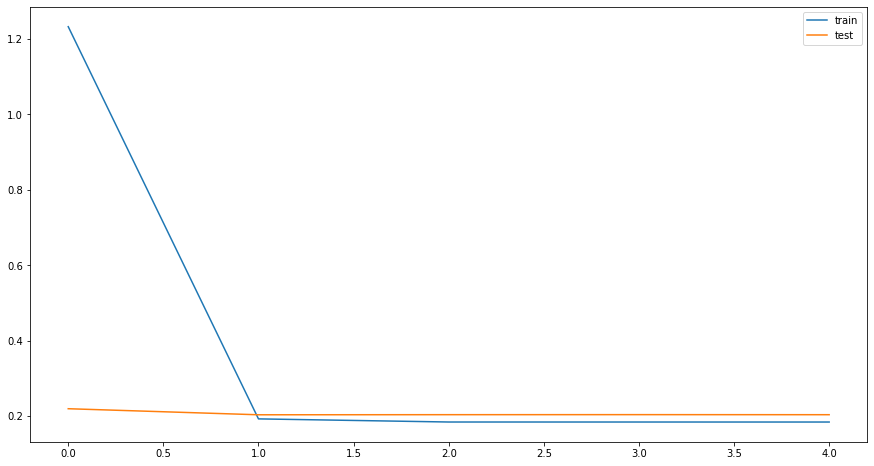

In [277]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [278]:
X_te_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [279]:
res = model_k.predict(X_te_reshaped)

In [280]:
test_data["DL_PRED"] = res

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# keras_show = TimeSeries(test_data,x="DATE_TIME",y=["USAGE","RF_PREDICTED","DL_PRED"],legend=True,plot_width=900, plot_height=350)
# show(keras_show)

p = figure(plot_width=1000, plot_height=350, x_axis_type="datetime")

p.line(test_data['DATE_TIME'], test_data['RF_PREDICTED'], color='gray', alpha=0.5)
p.line(test_data['DATE_TIME'], test_data['WS_50_mean'], color='black', alpha=1)
p.line(test_data['DATE_TIME'], test_data['DL_PRED'], color='red', alpha=0.5)
show(p)

In [30]:
df2.to_csv(r'/content/mast2.csv', index = False, header=True)